In [2]:
import pandas as pd 
import os, sys
import os.path as osp   
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../scripts")

In [16]:
test_dict = pd.read_pickle(osp.join("..", "test_folder", "MuonGun_VonMises2D.dat"))
# test_dict_en  = pd.read_pickle(osp.join("..", "test_folder", "GraphSageFullOscNext.dat"))

In [17]:
test_dict

{'id': array([1.38674343e+08, 1.38674404e+08, 1.38674406e+08, ...,
        1.40547545e+08, 1.40547554e+08, 1.40547589e+08]),
 'reco': array([[ 1.1921950e-01, -4.9005687e-01,  8.6349928e-01,  1.5234819e+02,
          7.3562793e+02],
        [-4.6342984e-01,  3.1450477e-01,  8.2844406e-01,  2.4578636e+02,
          1.1319984e+03],
        [ 7.8344613e-02, -7.4036688e-01,  6.6762185e-01,  7.5317116e+01,
          2.6942065e+02],
        ...,
        [-2.1875338e-01, -8.1700218e-01,  5.3353012e-01,  2.7764023e+02,
          6.2563477e+02],
        [-4.1886193e-01,  7.3151743e-01,  5.3799337e-01,  9.8415504e+01,
          3.0798291e+02],
        [-5.2951252e-01,  1.9281155e-01,  8.2609946e-01,  4.4486775e+00,
          1.6760302e+01]], dtype=float32),
 'targets': array([[ 0.10017299, -0.48524305,  0.8686222 ],
        [-0.4685187 ,  0.31039464,  0.82713085],
        [ 0.03581851, -0.71492344,  0.6982848 ],
        ...,
        [-0.314618  , -0.7628088 ,  0.5649233 ],
        [-0.33503303,  

In [18]:
id   = test_dict["id"]
reco = test_dict['reco']
truth = test_dict['targets']
Ns   = test_dict['Ns']

In [19]:
id_en    = test_dict["id"]
# reco_en = test_dict["reco"][:, 3]
sig_en  = 1/np.sqrt(test_dict["reco"][:, -1])
# true_en  = test_dict["targets"][:, 3]

In [20]:
from test_script import azi_zen_from_units

In [20]:
# kap = reco[:, 6]

In [21]:
reco_azi, reco_zen = azi_zen_from_units(reco[:, :3])
zen_kap            = reco[:, 4]
azi_kap            = reco[:, 3]
true_azi, true_zen = azi_zen_from_units(truth[:, :3])
# true_en            = truth[:, 3]



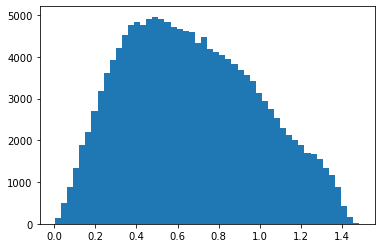

In [22]:
plt.hist(true_zen, bins = 50);

In [23]:
csv_dict = {
    "event_no": id, 
    "zenith": true_zen,
    "zenith_pred": reco_zen,
    "zenith_kap": zen_kap,
    # "energy_log10": true_en,
    # "energy_log10_pred":  reco_en,
    # "energy_log10_sig": sig_en,
    "azimuth": true_azi,
    "azimuth_pred": reco_azi,
    # "angle_kap": angle_kap
    "azimuth_kap": azi_kap
}
df = pd.DataFrame(csv_dict)
df.to_csv("/groups/hep/johannbs/common_predictions/predict_files/muongun_2d.csv")

In [24]:
df

event_no    zenith  zenith_pred   zenith_kap   azimuth  \
0       138674343.0  0.518382     0.528629   735.627930 -1.367217   
1       138674404.0  0.596813     0.594472  1131.998413  2.556479   
2       138674406.0  0.797798     0.839786   269.420654 -1.520737   
3       138674422.0  0.361612     0.369753  1196.852173 -2.323129   
4       138674459.0  0.864020     0.882395   177.163544 -2.772599   
...             ...       ...          ...          ...       ...   
149995  140547471.0  0.644613     0.638704   468.352936  1.480943   
149996  140547480.0  0.623863     0.633644   138.700821  1.861466   
149997  140547545.0  0.970456     1.008027   625.634766 -1.961986   
149998  140547554.0  0.940239     1.002742   307.982910  1.998519   
149999  140547589.0  0.502151     0.598646    16.760302  3.042548   

        azimuth_pred  azimuth_kap  
0          -1.332155   152.348190  
1           2.545342   245.786362  
2          -1.465370    75.317116  
3          -2.319150    83.452957  
4          -2.587197    38.185444  
...              ...          ...  
149995      1.514377   116.852943  
149996      1.572223    32.067924  
149997     -1.832411   277.640228  
149998      2.090820    98.415504  
149999      2.792386     4.448678  

[150000 rows x 7 columns]

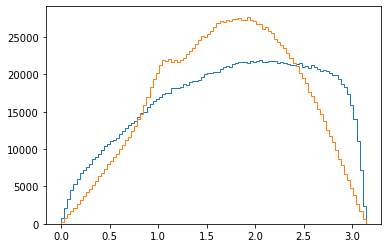

In [23]:
plt.hist(reco_zen, bins = 100, histtype= "step");
plt.hist(true_zen, bins = 100, histtype = "step");
# plt.hist(true_zen, bins = 100);

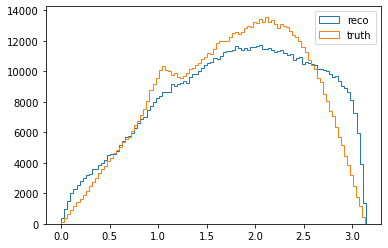

In [72]:
mask = kap > np.percentile(kap, 50)
plt.hist(reco_zen[mask], bins = 100, histtype= "step", label = "reco");
plt.hist(true_zen[mask], bins = 100, histtype = "step", label = "truth");
plt.legend()

In [45]:
kap_to_sig()

array([ 4.545292 ,  2.137183 ,  2.1101313, ..., 64.32493  ,  0.9828726,
       12.401186 ], dtype=float32)

In [51]:
def kap_to_sig(x):
    return np.sqrt( -2 * np.log((1 + np.exp(- 2 * x)) / (1 - np.exp(-2 * x)) - 1 / x))




In [56]:
sig = kap_to_sig(kap)

<ipython-input-51-d936f1ba4b72>:2: RuntimeWarning: invalid value encountered in log
  return np.sqrt( -2 * np.log((1 + np.exp(- 2 * x)) / (1 - np.exp(-2 * x)) - 1 / x))


In [59]:
sig[np.isnan(sig)] = np.mean(sig[~np.isnan(sig)])

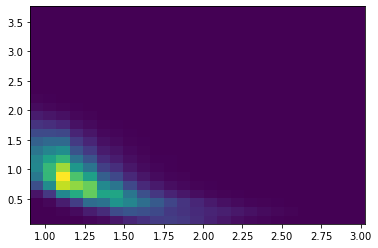

In [66]:
plt.hist2d(np.log10(Ns), sig, bins = 25);

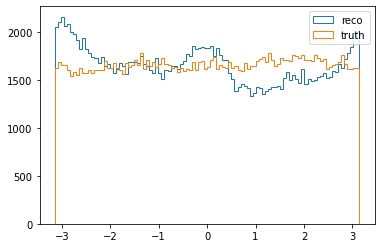

In [76]:
mask = kap < np.percentile(kap, 10)
plt.hist(reco_azi[mask], bins = 100, histtype= "step", label = "reco");
plt.hist(true_azi[mask], bins = 100, histtype = "step", label = "truth");
plt.legend()

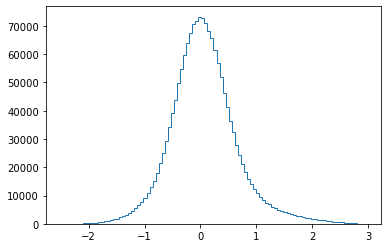

In [17]:
plt.hist(reco_zen - true_zen, bins = 100, histtype = "step");

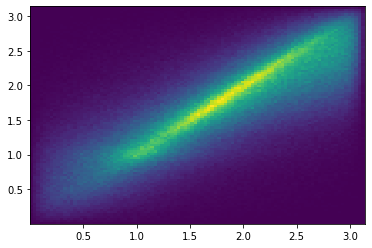

In [77]:
plt.hist2d(reco_zen, true_zen, bins = 100);

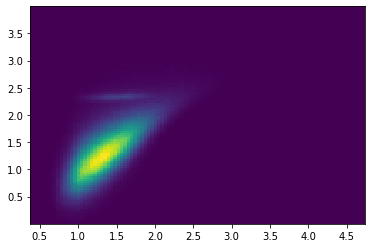

In [14]:
plt.hist2d(reco_en, true_en, bins = 100);

In [10]:
x[1].shape

(7, 5)

In [ ]:
pd.DataFrame(x[0])

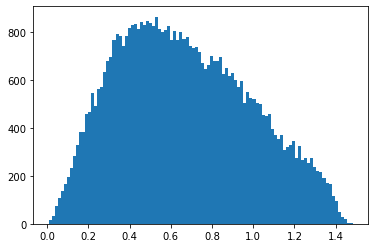

In [33]:
x, y = pd.read_pickle(os.path.join("..", "data", "features", "MuonsTest", "train50000.dat"))
plt.hist(y[:, 2], bins = 100);

In [37]:
y[:, 1:]

array([[4.434384  , 0.40617896],
       [1.39347674, 0.64952375],
       [0.93319101, 0.35560721],
       ...,
       [5.96767565, 1.02769969],
       [3.05269532, 1.13985414],
       [3.38052106, 1.05212987]])

In [36]:
import matplotlib.pyplot as plt 

np.concatenate(x)

array([[-0.80177513,  0.32778989,  0.36618868,  0.04853649,  1.03245861],
       [-0.80177513,  0.32778989,  0.33195904,  0.03668025,  0.50835111],
       [-0.80177513,  0.32778989,  0.29772942,  0.09373842,  0.23806267],
       ...,
       [-0.62053174,  0.81627012,  0.09174827, -0.22341608,  0.37896459],
       [-0.62053174,  0.81627012,  0.12597791, -0.27343461,  0.50835111],
       [-0.62053174,  0.81627012,  0.12597791, -0.30307521,  0.50835111]])

In [4]:
y

array([[7.13101600e+06, 1.51179985e+00, 1.17941677e+00],
       [7.13110100e+06, 5.37759901e+00, 1.84913419e+00],
       [7.13127100e+06, 6.17094016e+00, 2.17087827e+00],
       ...,
       [1.17104750e+08, 4.38546582e+00, 9.22474453e-01],
       [1.17104752e+08, 1.58638274e+00, 9.57550670e-01],
       [1.17104758e+08, 4.63404827e+00, 8.88264142e-01]])

In [20]:
xs = np.concatenate(x)
plt.hist(xs[:100000, :].T)


KeyboardInterrupt: 

In [ ]:
plt.hist(np.concatenate(x)[:10000, 4])

In [ ]:
from scripts.he

In [13]:
from helper_functions import angles_to_units

In [14]:
import tensorflow as tf

In [18]:
tf.math.reduce_euclidean_norm(angles_to_units(tf.cast(y, tf.float32)[:, 1:]), axis = 1

<tf.Tensor: shape=(50000, 3), dtype=float32, numpy=
array([[ 0.05450379,  0.92277545,  0.38146403],
       [ 0.59346974, -0.7565063 , -0.27475786],
       [ 0.8200959 , -0.09244053, -0.56471   ],
       ...,
       [-0.25597286, -0.75487983,  0.60384965],
       [-0.01274581,  0.817685  ,  0.57552475],
       [-0.06072835, -0.773598  ,  0.63075995]], dtype=float32)>

In [5]:
test_dict_en =  pd.read_csv("/groups/hep/johannbs/common_predictions/predict_files/GraphSageFullOscNext.csv")
test_dict    =  pd.read_csv("/groups/hep/johannbs/common_predictions/predict_files/current_best_predictions.csv")

In [9]:
test_dict_en

Unnamed: 0     event_no    zenith  zenith_pred  energy_log10  \
0                 0         76.0  0.680146     0.772731      0.489935   
1                 1        106.0  1.462410     1.100717      0.565702   
2                 2        116.0  1.292314     1.126332      0.431264   
3                 3        117.0  0.917258     1.395845      0.688579   
4                 4        234.0  1.708858     1.995492      0.798515   
...             ...          ...       ...          ...           ...   
1658357     1658357  117104472.0  2.881571     2.089320      2.473206   
1658358     1658358  117104502.0  2.144759     1.388893      2.326838   
1658359     1658359  117104505.0  2.107286     1.751509      2.386758   
1658360     1658360  117104516.0  1.952279     1.747826      2.304267   
1658361     1658361  117104703.0  2.140072     2.152341      2.407542   

         energy_log10_pred   azimuth  azimuth_pred  
0                 0.779834 -0.762269      1.741354  
1                 0.791451  1.676636      1.840999  
2                 0.874128 -2.903384      1.800940  
3                 0.982745 -0.725367      1.632397  
4                 1.007212 -2.697886      1.934799  
...                    ...       ...           ...  
1658357           1.377652 -1.058540      2.030991  
1658358           1.645587  1.257497      2.408676  
1658359           1.892986  0.727648      2.583078  
1658360           1.779476  0.007731      2.255369  
1658361           1.596169 -3.112698      2.308474  

[1658362 rows x 8 columns]

In [10]:
test_dict['energy_log10_pred'] = test_dict_en['energy_log10_pred']
# test_dict['energy_log10_sig']  = test_dict_en['energy_log10_sig']

In [12]:
test_dict.to_csv("/groups/hep/johannbs/common_predictions/predict_files/collected_results.csv")

In [13]:
df

NameError: name 'df' is not defined

In [ ]:
import sqlite3 2"

In [ ]:
path = "/groups/hep/pcs557/databases/dev_lvl7_mu_nu_e_classification_v003/data/dev_lvl7_mu_nu_e_classification_v003_unscaled.db"
with sqlite3.connect(path) as conn:
